## 0. What We Are Going To Do:
We are going to classify images of handwritten digits (MNIST dataset) using a fully-connected neural network.
After successful training, our model will be able to guess digits.

In [2]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model
from sklearn.preprocessing import normalize

Using TensorFlow backend.


## 1. Prepare Data:

The dataset is loaded in this section. 

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('train data dim:', x_train.shape)
print(np.max(x_train))
print(np.min(x_train))

train data dim: (60000, 28, 28)
255
0


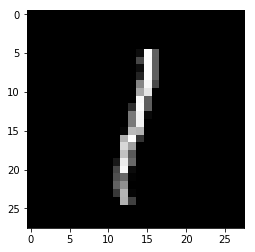

1


In [6]:
rand_num = np.random.randint(len(x_train))

plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
print(y_train[rand_num])

**Our Network accept 1D data. So we flatten our 2D image.**

In [13]:
temp = len(x_train[0])
x_train = np.reshape(x_train,(len(x_train), temp))
x_test = np.reshape(x_test,(len(x_test), temp))

**Normalize data by rescaling them to (0,1)**

In [14]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

**Convert label arrays to 1-hot representation**

In [15]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 2. Define Model
**Add the following layers to the network:**
* Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
* Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
* Outout Layer: Fully Connected + Softmax Activition (e.g 10 Neurons) calasses:[0,1,2,3,4,5,6,7,8,9]

In [16]:
model = Sequential()
# Hidden Layer1:
model.add(Dense(512, activation='relu',kernel_initializer = RandomNormal(0,0.01), input_shape=(temp,)))
# Hidden Layer2:
model.add(Dense(512, activation='relu',kernel_initializer = RandomNormal(0,0.01)))
# Output Layer1:
model.add(Dense(10, activation='softmax',kernel_initializer = RandomNormal(0,0.01)))

**Determine loss function, optimizer and metrics for the model**

In [17]:
#the optimizer and its learning rate
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])